# Assignment due Jan 20 - Numpy and Linear Algebra
All questions are weighted the same in this assignment.

### For all questions write your own code and comments explaining what your code is doing. Make sure to demonstrate your code working for a few case studies


# Part 1 - Basics of Linear Algebra

In [8]:
import numpy as np
import matplotlib.pyplot as plt

### Question 1 - Creating Vectors and Matrices

In the cell below please create the vectors and matrices as described in the comments.

In [3]:
original_matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])

# Create a column vector that contains all of the elements in the original matrix in order
col_vec1 = original_matrix.reshape(9,1)
print("The original matrix as a column vector:\n", col_vec1)

# Write a command that will help you investigate the use of the numpy.flip command:
'''
np.flip? #remove single quotes to run
'''

# Use the flip command to create a row vector that contains all of the elements in the 
# original matrix in reverse order
row_vec1= original_matrix.reshape(1,9)
row_vec1 = np.flip(row_vec1)
print("row vector of the flipped matrix:", row_vec1)

# Find a the scalar that is at the center of the original_matrix
scalar = original_matrix[1,1]
print("The center of the matrix is:", scalar)


# Find the matrix product between the original_matrix and the first three elements of 
# your column vector
mat_prod = np.matmul(original_matrix, col_vec1[:3])
print("matrix times column vector = \n", mat_prod)

# use BROADCASTING multiply each column in original_matrix by the first three elements of
# your column vector
mat_brod = (original_matrix*col_vec1[:3])
print("Broadcast: \n", mat_brod)

The original matrix as a column vector:
 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
row vector of the flipped matrix: [[9 8 7 6 5 4 3 2 1]]
The center of the matrix is: 5
matrix times column vector = 
 [[14]
 [32]
 [50]]
Broadcast: 
 [[ 1  2  3]
 [ 8 10 12]
 [21 24 27]]


`np.flip?` brings up information on the flip function from the numpy library. It states that it reverses the order of elements in an array along the given axis.
The shape of the array is preserved, but the elements are reordered.

### Question 2 - Size and Element Operations on a Matrix

Write a python functon that takes as an input a 2-D matrix of any size greater than 2X2 and then does the following:

- Finds the shape of the input matrix
- Cuts down the input matrix into a square matrix by eliminating last rows/cols as needed
- Applies a vectorized lambda that adds the number of deleted elements to each element of the square matrix. For example if the input is square you do nothing, if the input is (3,2) you cut off the third row and then add 2 because the third row had 2 elements. 
- Returns the new matrix

In [56]:
def matrix_stuff(A):
    shape = A.shape
    mat_rows = A.shape[0] 
    mat_cols = A.shape[1]
    
    if (mat_rows > mat_cols): # checks if the input matrix has more rows than cols
        extra_rows = mat_rows - mat_cols # finds the difference in rows and cols
        sqaure_mat = A[:mat_cols, :mat_cols] # slices the input matrix to an NxN sqaure matrix
        add_elements = lambda i: i + ((extra_rows*mat_cols)) #takes the extra rows and mult but the number of cols
        add_vec = np.vectorize(add_elements) #vectorizes the matrix
        return add(square_mat) # returns the NxN matrix
    
    elif (mat_rows < mat_cols): # same process as above but if cols is more than rows
        extra_cols = mat_cols - mat_rows
        square_mat = A[:mat_rows, :mat_rows]
        add_elements = lambda i: i +(extra_cols * mat_rows)
        add_vec = np.vectorize(add_elements)
        return add_vec(square_mat)
    
    else:
        return A
    
#collab with John

# Show that your function works for this example and one other
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[0,2,4,6,8],
             [10,12,14,16,18,],
             [20,22,24,26,28]])

In [57]:
# example of matrix_dim
#A.shape
print("For matrix A: \n", matrix_stuff(A))
print("For matrix B: \n", matrix_stuff(B))



For matrix A: 
 [[3 4]
 [6 7]]
For matrix B: 
 [[ 6  8 10]
 [16 18 20]
 [26 28 30]]


### Question 3 - Matrix Operations


In [4]:
# Given the following definitions
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([[2],[4],[6]])

In [5]:
# Explain what the following command does and what the shapes of all the sub elements are.
# Does the shape of C make sense to you?

C = np.dot( np.add( np.matmul(A,b),b ).T, b )

array([[968]])

The code first matrix multiples matrix A and b resulting in a 1 by 3 column vector, and then it'll transpose it to a row vector. Next, the code will add b to the new 3 by 1 matrix.  Finally the code will take the dot product and result in a scalar.

In [11]:
# Assume that you have a linear system defined by Ax=b
# Solve this linear system for x

Ainv = np.linalg.inv(A)
print("A^{-1} = \n", Ainv)

x = np.matmul(Ainv,b)
print("A^{-1}b = \n", x)


A^{-1} = 
 [[ 3.15251974e+15 -6.30503948e+15  3.15251974e+15]
 [-6.30503948e+15  1.26100790e+16 -6.30503948e+15]
 [ 3.15251974e+15 -6.30503948e+15  3.15251974e+15]]
A^{-1}b = 
 [[ 8.]
 [-8.]
 [ 4.]]


Explanation for solving x when Ax = b where A and b are both matrices:
$$Ax = b \\
A^{-1}Ax = A^{-1}b \\
Ix = A^{-1}b \\
x = A^{-1}b$$ 

In [26]:
# Find the L2 norm of the vector x and the Frobenius norm of A
L2norm = np.linalg.norm(x)

FrobA = np.linalg.norm(A)

print("L2norm = \n", L2norm)
print("Frobenius norm = \n", FrobA)

L2norm = 
 12.0
Frobenius norm = 
 16.881943016134134


# Part 2 - Principle Component Analysis 
### (a very basic walkthrough - mostly just to practice python!)

This follows the example from: https://plot.ly/python/v3/ipython-notebooks/principal-component-analysis/

The basic idea is:

1. Find the covariance matrix for your data
2. Calculate the eigenvales and vectors for the covariance matrix
3. Create a matrix D that contains just the eigenvectors corresponding to the largest eigenvalues
4. Do a matrix multiplication c = Dx to project your data onto a smaller space
5. Plot the new data and look for trends


In [12]:
# First use pandas to import and look at the data set
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end


# Print out the first few and last few rows of the data frame:
print(df.head())
print(df.tail())

   sepal_len  sepal_wid  petal_len  petal_wid        class
0        5.1        3.5        1.4        0.2  Iris-setosa
1        4.9        3.0        1.4        0.2  Iris-setosa
2        4.7        3.2        1.3        0.2  Iris-setosa
3        4.6        3.1        1.5        0.2  Iris-setosa
4        5.0        3.6        1.4        0.2  Iris-setosa
     sepal_len  sepal_wid  petal_len  petal_wid           class
145        6.7        3.0        5.2        2.3  Iris-virginica
146        6.3        2.5        5.0        1.9  Iris-virginica
147        6.5        3.0        5.2        2.0  Iris-virginica
148        6.2        3.4        5.4        2.3  Iris-virginica
149        5.9        3.0        5.1        1.8  Iris-virginica


The iris dataset that we just imported contains measurements for 150 iris flowers from three different species.

The three classes or species in the Iris dataset are:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

And the four features of in Iris dataset are:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm
    
We are going to do an analysis of this data set as parts of the next questions

### Question 1

Create two numpy arrays:
- X should contain all of the data in the first four columns of the data set
- Y should contain the labels in the last column of the data set

#### NOTE: The rows of X are called feature vectors. Each row corresponds to all of the data in one flower obervation.

In [58]:
df_array = np.array(df)
X = df_array[:,:4]
Y = df_array[:,-1]

In [15]:
# Check the shape and type of the arrays that you just created - print this out
print("The shape of the X array is: \n", np.shape(X), 
      "\n The type of the X array is: \n", type(X))
print("The shape of the Y array is: \n", np.shape(Y), 
      "\n The type of the Y array is: \n", type(Y))

The shape of the X array is: 
 (150, 4) 
 The type of the X array is: 
 <class 'numpy.ndarray'>
The shape of the Y array is: 
 (150,) 
 The type of the Y array is: 
 <class 'numpy.ndarray'>


### Question 2 - ALWAYS explore your data before doing anything else!

Below is code that uses matplotlib to plot histograms for our data. Please comment the code to explain what each line is doing. Then explore the plots and answer the final question below.


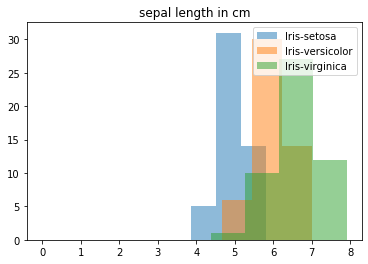

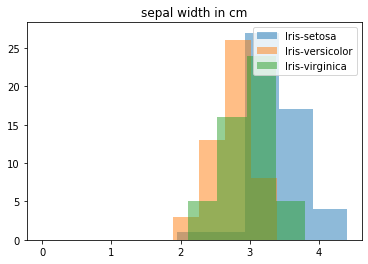

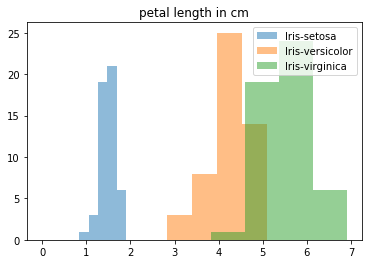

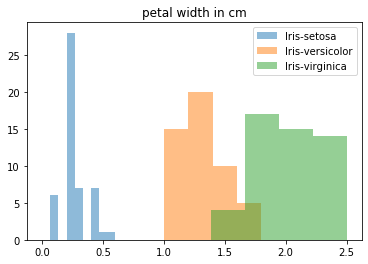

In [16]:
import matplotlib.pyplot as plt
import numpy as np

features = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm'] # pulls data for each plot based on name
colors = ['Iris-setosa','Iris-versicolor','Iris-virginica'] # creates list from the indexes of colors from the data frame

for col in range(4): # range(4) first 4 cases of data
    loc = 0 # start at 0 on x-axis
    for key in colors: # for loop that loops over the color keys in the dict.
        hist_data = X[Y==key, col] # taking X array and giving it the color/flower keys from array Y
        bins = np.linspace(0,np.max(hist_data),10) # provides the number of bins and the width of the bins
        plt.hist(hist_data, bins, alpha=0.5, label=colors[loc]) # plotting the hist where alpha effects the transperancy and the label can be used in the legend
        plt.legend(loc='upper right') # show legend in upper right 
        plt.title(features[col]) # show title 
        loc +=1 #increment the x-axis from 0 going up +1
        
    plt.show() # show figure

#### Are there any of the four features that seem to really help in telling the types of flowers apart (classifying them)? Are there some that seem less important?

Color seems like an important feature that can be used to distinguish between the different types of flowers.  If all flowers were the same color it would be nearly impossible to see any overlap or flower types.  In addition the transperancy (alpha) of the bars seem helpful to see overlap.

The width of the bins is one of the less important features of the histogram as long as the ratio on the x-axis remains the same.

### Question 3

Now we get into the method of Principle Component Analysis (PCA)

Here is a link for more information:
https://builtin.com/data-science/step-step-explanation-principal-component-analysis

First we need to standardize the data. We will talk more about why this is important (later in class) but the basic idea is that we want all of our feature data to be over about the same scales. In general this means we want to measure all the data with the same lenght measuring stick, so if some data is in miles and other data is in cm, it is hard to comare the variation of effects directly.

In [39]:
# You don't need to do anything here - just run the cell
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [42]:
# Find the covariance matrix of the standardized matrix X_std
cov_mat = np.cov(X_std.T) # transpose the matrix so we can get a normal matrix
print(np.shape(X_std))
print('NumPy covariance matrix: \n%s' %cov_mat)


(150, 4)
NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [43]:
# Find the eigenvalues and Eigenvectors of the covariance matrix

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [44]:
# Now we will keep just the first two principle components corresponding to the 
# largest two eigenvalues (here we look at the largest absolute value)
# What we are doing here is defining new asis along which there is the largest variance

# Define V1 to be the eigenvector corresponding to the largest eigenvalue
    ## could write as first column of the matrix
V1 = np.array([0.52237162, -0.26335492, 0.58125401, 0.56561105])

# Define V2 to be the eigenvector corresponding to the second largest eigenvalue
    ## could write as second column of the matrix 
V2 = np.array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])

In [61]:
# Create an np.array that contains V1 and V2 along the columns
# This array should be a 4x2 matrix!

D = np.array([V1,V2]).T
print("shape is: \n", np.shape(D))
print(D)


shape is: 
 (4, 2)
[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [64]:
# Write code that does the dimensionality reduction by multiplying D times each of 
# the feature vectors. Literally this means doing D times each row in X_std

# We can do this using broadcasting which applies the dot product to each column
NewX = np.dot(X_std,D)
print(np.shape(NewX))
# What is the shape of D?
print("The shape of D is: \n", np.shape(D))    ## D is a 4x2 matrix
# What is the shape of each feature vector?
    ## the shape of each feature vector is 2D
# What is the shape of NewX? Does this make sense?
    ## NewX is 150x2,this makes sense due to the dot product operation since the matrix takes the rows of the first matrix and the columns and multiples and sums the rows.

(150, 2)
The shape of D is: 
 (4, 2)


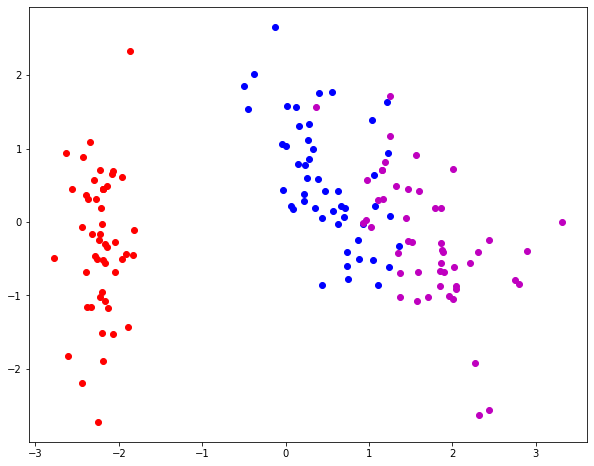

In [65]:
# Now lets plot the new space and see if our irises are easier to classify 
# Just run the cell - but add comments to show that you know what it does

features = ['PC1', 'PC2'] # the data, similar to coordinate pairs
colors = ['Iris-setosa','Iris-versicolor','Iris-virginica'] # three types of flowers (acting like identification)
pltcol = ['r','b','m'] #gives color to the data point of its respective flower

# Scatter Plot
plt.figure(figsize=(10, 8)) # width and height of the figure

loc=0 # location on x-axis
for key in colors:
    X_data = NewX[Y==key, 0] # the X data from NewX for when the 
    Y_data = NewX[Y==key, 1] # the Y data from NewY for when the 
    plt.plot(X_data, Y_data, 'o', color=pltcol[loc]) # plot the x and y data with a marker 'o' and the colors given from the pltcol line
    loc += 1 #increments of 1
        

plt.show() # show plot

#### Can you see a clear separation of the data here? You can imagine that it would be easier for us or for a machine to figure out which class the flower belongs to.

I can see the seperation of the data since the points are different colors.  But if they were all the same color or label then I would only see two distinct groups because of the white space in between the groups.

# Part 3 - Explore numpy!

Below are a few more useful commands. Use the ? help to see if you can figure out what the commands do. Show how you might use them



In [ ]:
#np.empty?

`np.empy?` states that the function return a new array of given shape and type, without initializing entries. The array of uninitialized (arbitrary) data of the given shape, dtype, and order. However, an object arrays will be initialized to `None`.

In [18]:
#example of np.empty
np.empty([3,3]) #can use dtype to change the output type

array([[72.,  0.,  0.],
       [ 0., 72.,  0.],
       [ 0.,  0.,  1.]])

In [ ]:
#np.zeros?

`np.zeros` returns a new array setting values to zero.

In [35]:
#example of np.zeros
zero_example = np.zeros([3,3])
print(zero_example)
print(type(zero_example))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
<class 'numpy.ndarray'>


In [ ]:
#np.zeros_like?

`np.zeros_like` returns an array of zeros with the same shape and type as a given array.

In [31]:
mat_example = np.array([[1,2,3],
                      [4,5,6],
                      [7,8,9]])
print("mat_example type: \n", type(mat_example))
mat_example_zero = np.zeros_like(mat_example)
print("mat_example_zero type: \n", type(mat_example_zero))

mat_example type: 
 <class 'numpy.ndarray'>
mat_example_zero type: 
 <class 'numpy.ndarray'>


In [ ]:
#np.diag?

`np.diag` will extract a diagonal or construct a diagonal array.  If you input a 2-D array, v, it will return a copy of its k-th diagonal. If v is a 1-D array, it returns a 2-D array with v on the k-th diagonal.

In [36]:
# np.diag example
np.diag(mat_example)

array([1, 5, 9])

In [ ]:
#np.eye?

`np.eye` returns a 2-D array with ones on the diagonal and zeros elsewhere.  \
Its input N is an int which represents the number of rows in the output. \
M is an optional int representing the Number of columns in the output. If None, defaults to N. \
Another optiontal input is k which is the index of the diagonal: 0 (the default) refers to the main diagonal, a positive value refers to an upper diagonal, and a negative value to a lower diagonal.

In [38]:
np.eye(4) # makes identity matrix??

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

Here is another cheat sheet: https://www.dataquest.io/blog/numpy-cheat-sheet/

Are there any other numpy commands that seem really useful or interesting to you?

I found `np.linspace` useful in my physics classes which just returns evenly spaced numbers over a specified interval.
Not so much a command, but the SciPy package was also helpful in some situations so I'm starting to see how it could also be used here for matrix and array operations.